<a href="https://colab.research.google.com/github/boyoung21/ESAA/blob/main/0922_%EB%B9%84%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5_2_%EA%B0%80%EC%9A%B0%EC%8B%9C%EC%95%88_%ED%98%BC%ED%95%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 9.2 가우시안 혼합

GMM(가우시안 혼합 모델)은 샘플이 파라미터가 알려지지 않은 여러 개의 혼합된 가우시안 분포에서 생성되었다고 가정하는 확률 모델 -> 하나의 가우시안 분포에서 생성된 모든 샘플은 하나의 클러스터를 형성함. 일반적으로 이 클러스터는 타원형.



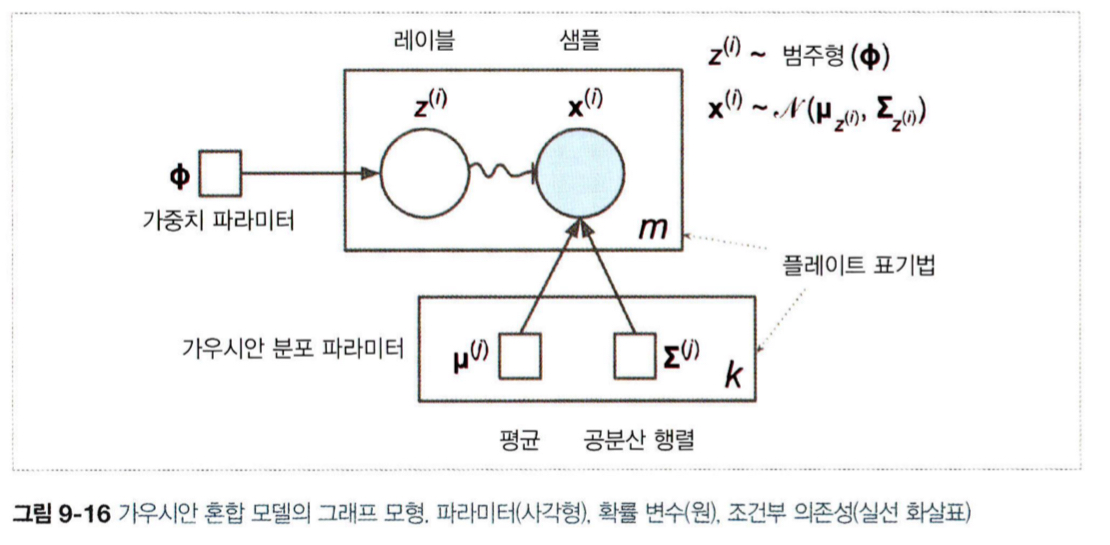

각 클러스터는 위의 그림처럼 타원의 모양, 크기, 밀집도, 방향이 다름. 또, 가우시안 분포 중 하나에서 생성된 것을 알고 있지만 어떤 분포이며 파라미터가 어떤 것인지는 알지 못함.

데이터세트 X가 다음 확률 과정을 통해 생성되었다고 가정

- 샘플마다 k개의 클러스터에서 랜덤하게 한 클러스터가 선택됨
- j번째 클러스터를 선택할 확률은 클러스터의 가중치 phi로 정의
- i번째 샘플을 위해 선택한 클러스터 인덱스는 zi로 표시
- zi = j면, 즉 i번째 샘플이 j번째 클러스터에 할당되었다면 해당 샘플의 위치 xi는 평균이 mj고 공분산 행렬이 sigma(j)인 가우시안 분포에서 랜덤하게 샘플링됨
- x~N(m,sigma(j))



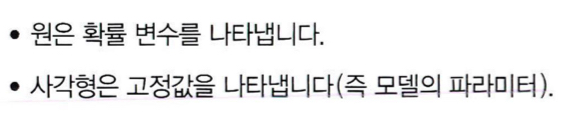

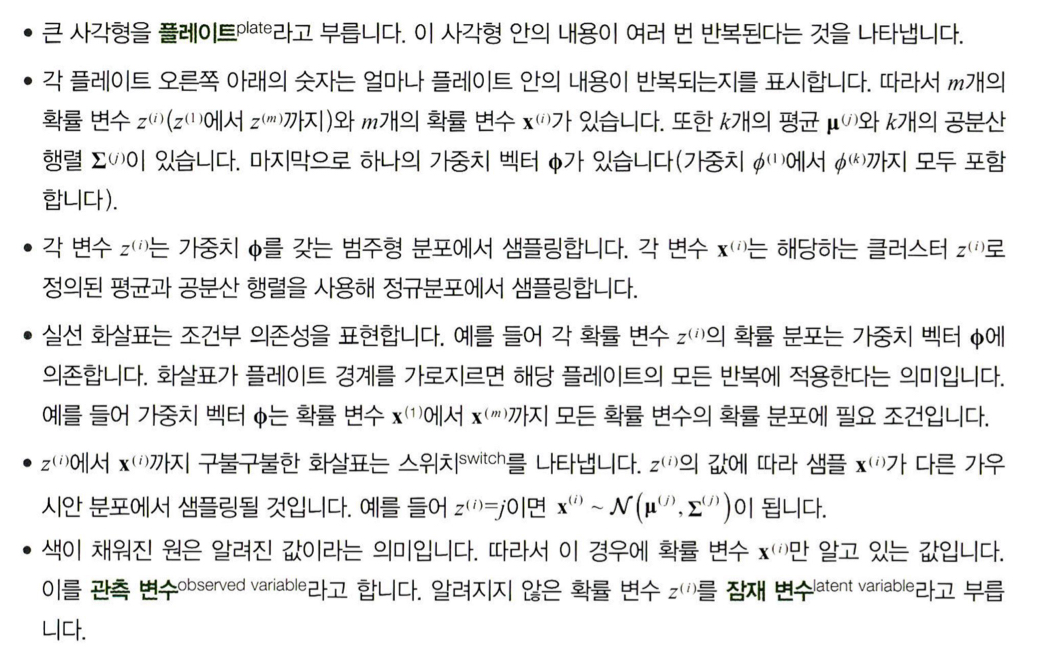

해당 모델은 데이터셋 x가 주어지면 가중치 phi와 전체 분포의 파라미터 m(1)에서 m(k)까지와 sigma(i)에서 sigma(k)까지를 추정

In [18]:
import numpy as np

from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.05)

In [19]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init = 10)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

In [20]:
# 데이터를 생성하기 위해 사용한 가중치

gm.weights_

array([0.58550867, 0.21325645, 0.20123488])

In [21]:
gm.means_

array([[ 0.51598441,  0.23623994],
       [-0.71866505,  0.57872861],
       [ 1.74563397, -0.05604701]])

In [22]:
gm.covariances_

array([[[ 0.16562058, -0.09783809],
        [-0.09783809,  0.28409602]],

       [[ 0.05945884,  0.06465808],
        [ 0.06465808,  0.08738647]],

       [[ 0.05222133,  0.06199207],
        [ 0.06199207,  0.08886595]]])

해당 클래스는 기댓값-최대화(EM) 알고리즘을 사용함. 이 알고리즘은 k-평균 알고리즘과 공통점이 많음. 클러스터 파라미터를 랜덤하게 초기화하고 수렴할 때까지 두 단계를 반복함.

1. 기댓값 단계: 샘플을 클러스터에 할당
2. 최대화 단계: 클러스터를 업데이트

군집 입장에서 보면, EM을 클러스터 중심뿐만 아니라 크기, 모양, 방향과 클러스터의 상대적 가중치를 찾는 k-평균의 일반화로 생각할 수 있음.

k-평균과 달리 EM은 하드 클러스터 할당이 아니라, 소프트 클러스터 할당을 사용함.

예를 들어, 기댓값 단계에서 알고리즘은 현재 클러스터 파라미터에 기반하여 각 클러스터에 속할 확률을 예측함. 그 다음 최대화 단계에서 각 클러스터가 데이터셋에 있는 모든 샘플을 사용해 업데이트됨. 클러스터에 속할 추정 확률로 샘플에 가중치가 적용됨. 이 확률을 샘플에 대한 클러스터의 책임이라고 함. 최대화 단계에서 클러스터 업데이트는 책임이 가장 많은 샘플에 크게 영향받음.

n_init로 여러 번 실행하여 가장 좋은 솔루션을 선택해야 함.

In [23]:
gm.converged_

True

In [24]:
gm.n_iter_

16

In [25]:
# 하드 군집 -> predict() 메서드 사용
# 소프트 군집 -> predict_proba() 메서드 사용

gm.predict(X)[:10]

array([0, 0, 2, 1, 2, 0, 0, 0, 0, 0])

In [26]:
gm.predict_proba(X)

array([[1.00000000e+000, 2.30871473e-019, 7.58501713e-088],
       [1.00000000e+000, 4.04678458e-036, 4.45086821e-059],
       [4.53170616e-003, 3.60929516e-173, 9.95468294e-001],
       ...,
       [2.48751786e-002, 9.75124821e-001, 5.66608039e-205],
       [2.64027456e-002, 9.73597254e-001, 1.96029039e-210],
       [5.39573268e-004, 9.99460427e-001, 2.13819445e-205]])

가우시안 혼합 모델은 생성 모델임. 즉, 이 모델에서 새로운 샘플을 만들 수 있음. -> .sample 사용하면 X, y에 각각 샘플과 클러스터가

In [27]:
X_new, y_new = gm.sample(6)
X_new

array([[ 0.5447928 , -0.62510162],
       [-0.01916258,  0.18464453],
       [-1.4631733 , -0.10726302],
       [ 1.35054483, -0.49059247],
       [ 1.61668554, -0.32718723],
       [ 2.00999596,  0.21365351]])

In [28]:
y_new

array([0, 0, 1, 2, 2, 2])

또한, 주어진 위치에서 모델의 밀도를 추정할 수 있음. 이를 위해 score_samples() 메서드를 사용함. 샘플이 주어지면 이 메서드는 그 위치의 확률 밀도 함수의 로그를 예측함. 점수가 높을수록 밀도가 높음. 출력된 점수의 지숫값을 계산하면 샘플 위치에서 pdf 값을 얻을 수 있음. 이 값은 하나의 확률이 아닌 확률 밀도로, 0~1 사이가 아니라 어떤 양숫값도 결과가 될 수 있음.

In [29]:
gm.score_samples(X)[:10]

array([-1.51086206, -1.55300683, -0.36494828, -0.01427689, -1.67492272,
       -1.71692478, -1.44191872, -1.63547555, -1.278383  , -1.68115085])

샘플이 특정 지역 안에 속할 확률을 예측하려면 그 지역에 대해 PDF를 적분해야 함.

특성이나 클러스터가 많거나 샘플이 적을 때는 EM이 최적의 솔루션으로 수렴하기 어려움. 해당 어려움을 줄이려면 알고리즘이 학습할 파라미터 개수를 제한해야 함

- 클러스터의 모양과 방향의 범위를 제한: 공분산 행렬에 제약을 추가하여 가능
> covariance_type 매개변수에 다음 값 중 하나 설정
  
  > "spherical" - 모든 클러스터가 원형이나 지름, 즉 분산은 다를 수 있음

  > "diag" - 클러스터는 크기에 상관없이 어떤 타원형도 가능하나, 타원의 축은 좌표축과 나란해야 함. 즉 공분산 행렬이 대각행렬.

  > "tied" - 모든 클러스터가 동일한 타원 모양, 크기, 방향을 가짐. 즉, 모든 클러스터는 동일한 공분산 행렬을 공유

  > 기본값은 "full"이며, 각 클러스터는 모양, 크기, 방향에 제약이 없음. 각자 제약이 없는 공분산 행렬을 가짐.

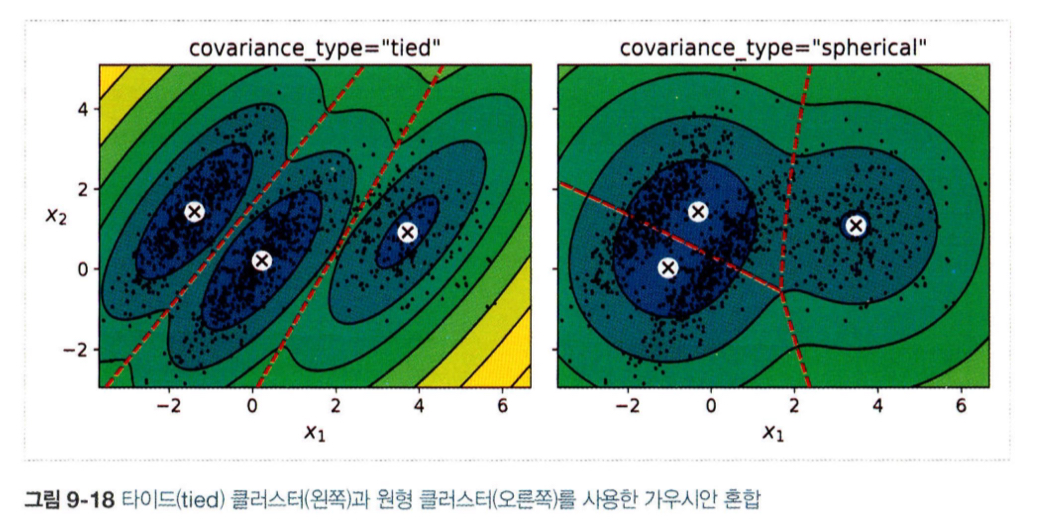

# 가우시안 혼합을 이용한 이상치 탐지

가우시안 혼합 모델을 이상치 탐지에 사용하는 방법은 밀도가 낮은 지역에 있는 모든 샘플을 이상치로 보는 것 -> 밀도 임곗값을 정해야 함. 거짓 앵성이 많으면 임곗값을 더 낮추고, 반대면 높이는 식으로. 이는 일반적인 정밀도/재현율 트레이드 오프

In [30]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

# 특이치 탐지

이상치 탐지와는 다른 부분: 깨끗한 데이터 세트에서 훈련한다는 것이 이상치 탐지와 다름. 이상치 탐지는 데이터세트 정제할 때 많이 사용한다면, 특이치 탐지는 정제가 다 된 후.

# 9.2.2 클러스터 개수 선택하기

k-평균에서는 이너셔나 실루엣 점수를 사용해 적절한 클러스터 개수를 선택하는데, 가우시안 혼합에서는 이런 지표를 사용할 수 없음. 이런 지표들은 클러스터가 타원형이거나 크기가 다를 때 안정적이지 않음.

대신 BIC, AIC 같은 이론적 정보 기준을 최소화하는 모델을 찾음

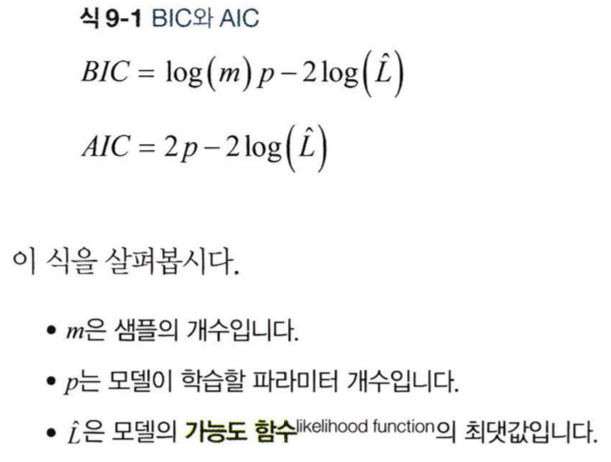







BIC, AIC는 모두 학습할 파라미터가 많은 즉 클러스터가 많은 모델에게 벌칙을 가하고 데이터에 잘 학습하는 모델에게 보상을 더함. 이 둘은 종종 동일한 모델을 선택하며, 다를 경우 BIC가 선택한 모델이 AIC가 선택한 모델보다 간단한 경향 있음.

파라미터 theta인 확률 모델이 주어지면 확률은 미래 출력 x가 얼마나 그럴듯한지 설명한다면, 가능도는 출력 x를 알고 있을 때 특정 파라미터값 theta가 얼마나 그럴듯한지 설명함.


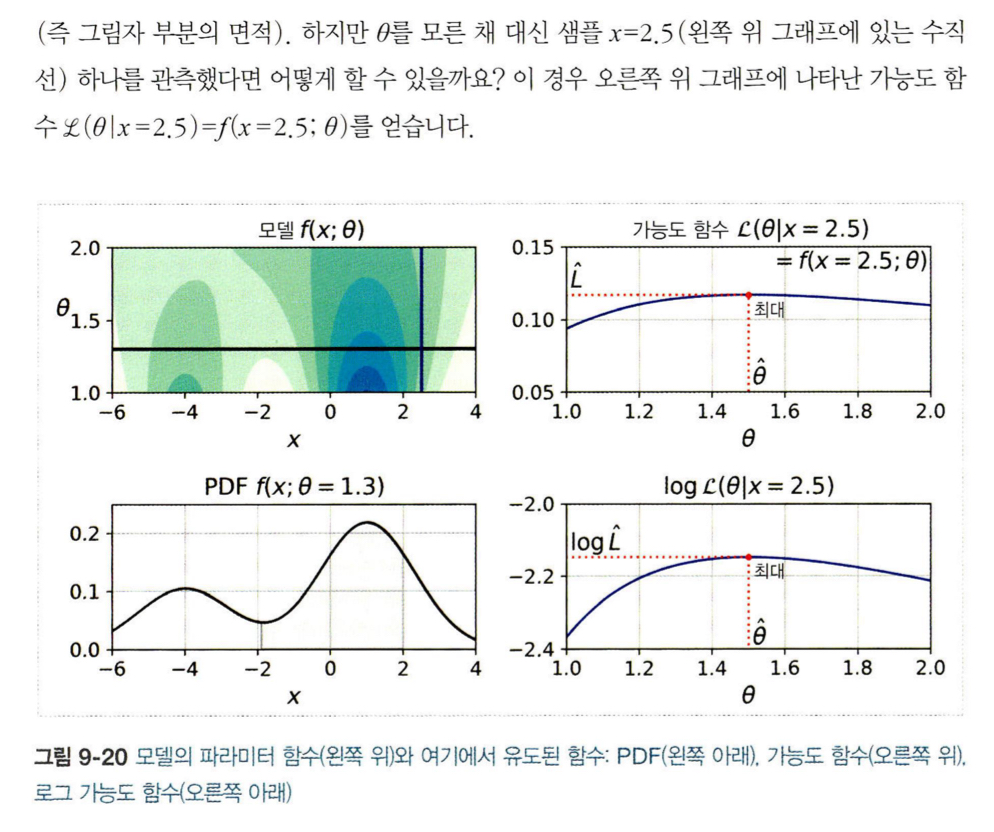

pdf는 theta가 고정된 x의 함수고, 가능도 함수는 x가 고정된 theta의 함수임. 가능도 함수는 확률 분포가 아니며, 가능한 모든 x에 eㅐ해서 확률 분포를 적분하면 항상 1이 됨. 모든 theta에 대해서 가능도 함수를 적분하면 어떤 양숫값도 될 수 있음.

데이터세트 x가 주어졌을 때 일반적으로 모델 파라미터에 대해 가장 그럴듯한 값을 예측하는데, 이를 위해 x에 대한 가능도 함수를 최대화하는 값을 찾아야 함.

- 최대 가능도 추정(MLE): 가능도 함수가 최대일 때 theta
- 최대 사후 확률(MAP): 사전 확률 분포 g를 알고 있을 때 가능도 함수에 곱해서 최대화하기 가능 -> map가 파라미터 값을 제약하므로 이를 mle의 규제 버전으로 생각 가능

In [31]:
gm.bic(X)

np.float64(2755.9194146875984)

In [32]:
gm.aic(X)

np.float64(2672.487574944902)

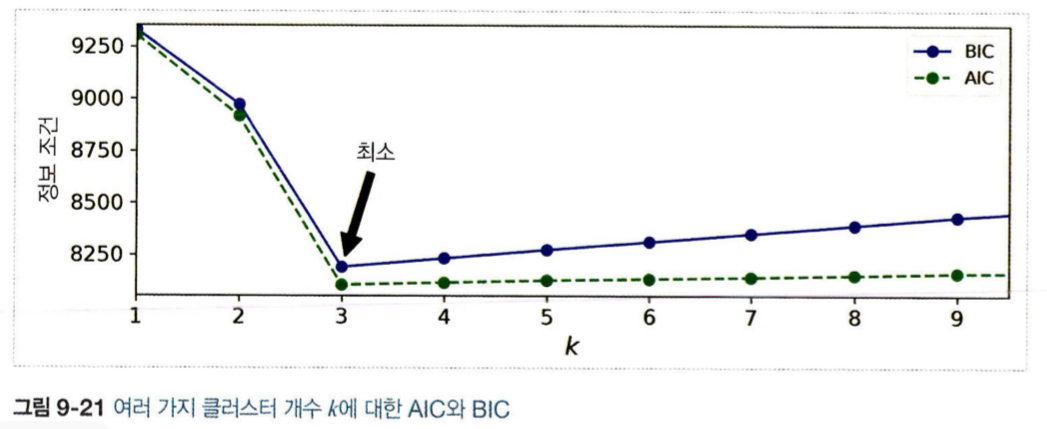

# 9.2.3 베이즈 가우시안 혼합 모델

최적의 클러스터 개수를 수동으로 찾지 않고 불필요한 클러스터의 가중치를 0으로 또는 0에 가깝게 만드는 BayesianGaussianMixture 클래스 사용 가능

클러스터 개수 n_components를 최적의 클러스터 개수보다 크다고 믿을 만한 값으로 지로함. 해당 알고리즘은 자동으로 불필요한 클러스터를 제거함.

In [33]:
from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components=10, n_init=10)
bgm.fit(X)
np.round(bgm.weights_, 2)

/usr/local/lib/python3.12/dist-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


array([0.17, 0.14, 0.12, 0.18, 0.09, 0.  , 0.11, 0.11, 0.1 , 0.  ])

해당 모델에서 클러스터 파라미터(가중치, 평균, 공분산 행렬 등)은 더는 고정된 모델 파라미터가 아니라 클러스터 할당처럼 잠재 확률변수로 취급됨. 따라서 이제 z vector는 클러스터 파라미터와 클러스터 할당을 모두 포함함.

# 베타 분포

고정 범위 안에 놓인 값을 가진 확률 변수를 모델링할 때 자주 사용. 범위는 0에서 1 사이.

ex) SBP(stick-breaking process)

phi = [0.3, 0.6, 0.5]를 가정하면, 샘플의 30%가 클러스터에 할당되고 그 다음 남은 샘플 중 60퍼가 클러스터 1에 할당, 그 다음 남은 샘플의 50%가 클러스터 2에 할당되는 식. -> 새로운 샘플이 작은 클러스터보다 큰 클러스터에 합류할 가능성이 높은 데이터셋에 잘 맞는 모델.

concentration(농도) alpha가 크면 phi값이 0에 가깝게 되고 SBP는 많은 클러스터를 만듦. 반대로 농도가 낮으면 phi값이 1에 가깝게 되고, 몇 개의 클러스터만 만들어짐. 마지막으로 위샤트 분포를 사용해 공분산 행렬을 샘플링함. 파라미터 d와 V가 분포 모양을 제어.

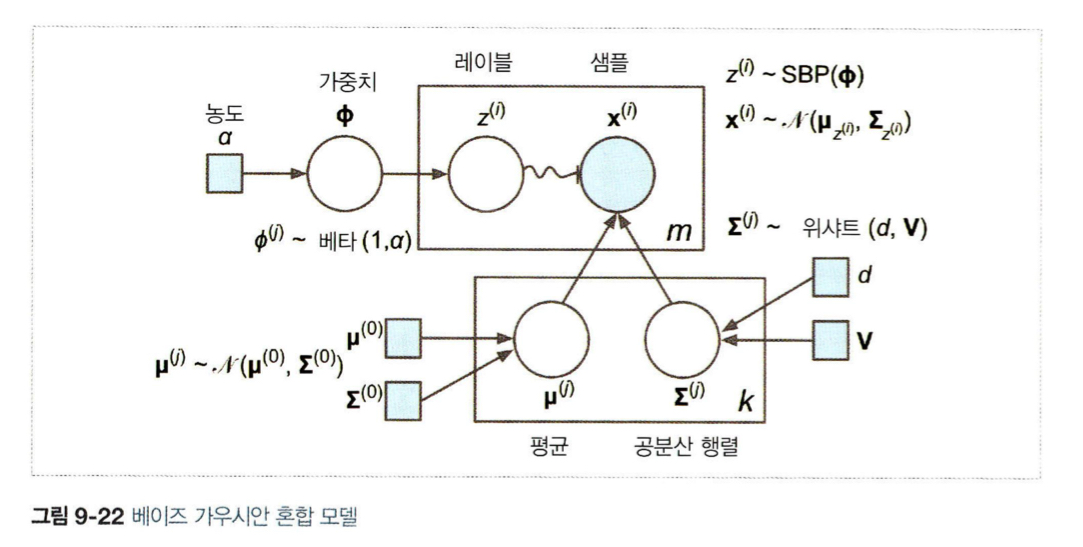

잠재 변수 z vector에 대한 사전 지식이 사전 확률이라는 확률 분포 p(z)에 인코딩될 수 있음. 클러스터가 적을 것이라는 사전 믿음을 가질 수 있음. 반대로 풍부하다고 믿을 때는 높은 농도를 의미. 이런 클러스터 개수에 대한 사전 믿음은 weight_concentration_prior 매개변수를 사용해 조정할 수 있음. 이를 0.01 또는 10,000으로 지정하면 매우 다른 군집 결과를 만듦. 데이터가 많을수록 사전 믿음은 중요하지 않으며, 사전 믿음으로 인한 큰 차이를 기대할 경우에는 1) 사전 믿음이 매우 강하고 2) 데이터는 적어야 함

# 베이즈 정리

데이터 X를 관측하고 난 후 잠재 변수에 대한 확률 분포를 업데이트하는 방법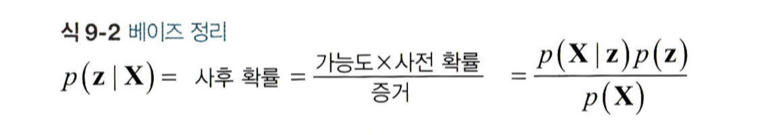

가우시안 혼합 모델에서는 분모인 p(x)는 계산하기 힘든데, 가능한 모든 z값에 대해 적분해야 하기 때문임. 모든 클러스터 파라미터와 클러스터 할당의 조합을 고려해야 함.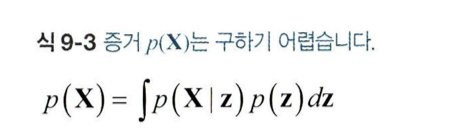

위와 같은 문제점을 해결하기 위한 방법으로 변분 추론(variational inference)가 있음. 자체적인 변분 파라미터 람다를 가진 분포 패밀리 q(z; lambda)를 선택한 다음 q(z)가 p(z|X)의 좋은 근삿값이 되도록 파라미터를 최적화. q(z)에서 p(z|X)로의 KL 발산을 최소화하는 lambda 값을 찾아 이를 해결함. 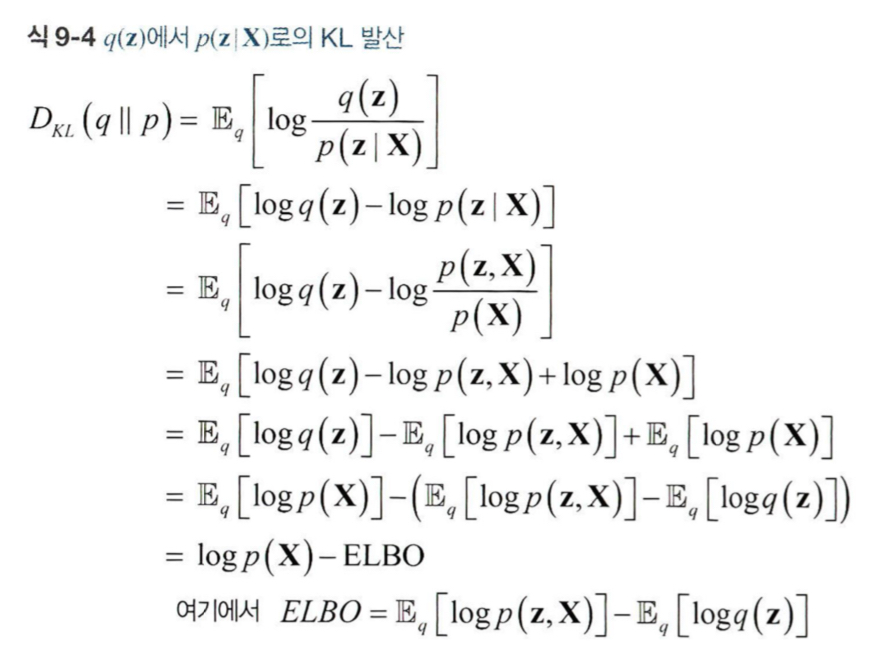

실전에서는 다른 기법으로 ELBO를 최대화함. 평균장 변분 추론에서는 ELBO 식을 계산할 수 있는 형태로 단순화하기 위해 분포 패밀리 q(z;lambda)와 사전 확률 p(z)를 매우 주의 깊게 선택해야 함.

또, ELBO를 최대화하는 간단한 방법은 블랙 박스 확률적 변분 추론이 있음. 각 반복에서 몇 개의 샘플을 q에서 뽑아 변분 파라미터 lambda에 대한 ELBO의 그레이디언트를 추정하는 데 사용함. 그 다음 경사 상승법 스텝에서 사용.